<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity11__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 11.1 Data Preparation

In [23]:
# Read data from 2 files:
df_R = pd.read_csv('/content/drive/MyDrive/dataset_lab11/ml-25m/ml-25m/ratings.csv')
df_M = pd.read_csv('/content/drive/MyDrive/dataset_lab11/ml-25m/ml-25m/movies.csv')

In [24]:
df_R

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [25]:
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [27]:
#Join dataframe rating and movie
df = pd.merge(df_R, df_M, how="left", on="movieId")

In [28]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


In [29]:
num_feature = ['userId', 'movieId', 'rating']
df_num = df[num_feature]

In [30]:
df_num

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [31]:
#Preapare Train, validation data
# Train_test_split() #using option stratify=df.rating

train, test = train_test_split(df_num, test_size=0.25, stratify=df['rating']) 

In [32]:
train, validate = train_test_split(train, test_size=0.25)

In [33]:
train

,userId,movieId,rating
23577046,153033,68237,4.0
21572301,140267,2313,4.0
22060107,143420,3527,3.0
16450450,106719,1201,4.0
1872055,12433,8914,3.5
...,...,...,...
3779201,24906,122906,3.5
17523051,113604,736,3.5
12096016,78442,130450,3.0
17900656,116048,58559,2.5


In [34]:
validate

,userId,movieId,rating
6991406,45360,595,5.0
21730033,141280,6218,4.0
17503421,113448,500,3.5
16249801,105364,25,5.0
1940641,12919,6957,3.5
...,...,...,...
11160061,72356,69275,3.0
681893,4663,1127,5.0
12122266,78616,3751,5.0
21828980,141913,2137,4.0


In [35]:
test

,userId,movieId,rating
14123067,91537,253,3.0
4878939,31813,5038,4.5
6165136,39912,1219,3.0
1650719,11021,678,4.0
1000629,6751,2779,3.0
...,...,...,...
17824363,115548,168498,3.0
2460178,16408,164179,4.5
8538009,55618,4226,5.0
3032364,20020,1186,5.0


In [41]:
# Re-numbering userId ( to eliminate skipping id)
userId_list =  df['userId'].unique() # get unique value from df['userId']
dict_users = {}
index = 0
for ids in sorted(userId_list):
  dict_users[ids] = index
  index += 1

In [42]:
# Re-numbering movieId
movieId_list =  df['movieId'].unique() # get unique value from df['movieId']
dict_movies = {}
index = 0
for ids in sorted(movieId_list):
    dict_movies[ids] = index
    index += 1

In [43]:
#Map new id to train, validation for both “userId”, “movieId”
# Using map() function

train["movieId"] = train["movieId"].map(dict_movies)
validate["movieId"] = validate["movieId"].map(dict_movies)

train["userId"] = train["userId"].map(dict_users)
validate["userId"] = validate["userId"].map(dict_users)

In [44]:
train

,userId,movieId,rating
23577046,153032,13261,4.0
21572301,140266,2222,4.0
22060107,143419,3429,3.0
16450450,106718,1171,4.0
1872055,12432,8199,3.5
...,...,...,...
3779201,24905,24544,3.5
17523051,113603,721,3.5
12096016,78441,27020,3.0
17900656,116047,12216,2.5


In [45]:
validate

,userId,movieId,rating
6991406,45359,587,5.0
21730033,141279,6106,4.0
17503421,113447,495,3.5
16249801,105363,24,5.0
1940641,12918,6832,3.5
...,...,...,...
11160061,72355,13402,3.0
681893,4662,1099,5.0
12122266,78615,3650,5.0
21828980,141912,2047,4.0


# 11.2 Model Preparation and Training

In [46]:
num_unique_users=len(set(list(train.userId.unique()) + list(validate.userId.unique())))
num_unique_movies=len(set(list(train.movieId.unique()) + list(validate.movieId.unique())))

In [47]:
# Create Model NCF
EMBEDDING_SIZE=100
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(num_unique_users + 1, EMBEDDING_SIZE,
name="users_embeddings")(users_input)
users_bias = Embedding(num_unique_users + 1, 1, name="users_bias")(users_input)

movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(num_unique_movies + 1, EMBEDDING_SIZE,
name="movies_embeddings")(movies_input)
movies_bias = Embedding(num_unique_movies + 1, 1, name="movies_bias")(movies_input)
dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)

model = Model(inputs=[users_input, movies_input], outputs=output)
opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


* 11.2 Model Summary and Training

In [48]:
# ------------ View Model Summary -------------------------------
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 100)       16254200    ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 100)       5586600     ['movies_input[0][0]']           
                                                                                              

In [50]:
# ------------ Training Model -------------------------------
#BS = [64, 128, 256, 512, 1024, 2048] # try at least 3 values
BS = 64

#EP = [5, 10, 20, 50, 60 ] # try at least 3 values
EP = 5

history = model.fit(
                      x=[train.userId, train.movieId],
                      y=train.rating,
                      batch_size=BS,
                      epochs=EP,
                      verbose=1,
                      validation_data=([validate.userId, validate.movieId], validate.rating))

Epoch 1/5
219728/219728 [==============================] - 3184s 14ms/step - loss: 0.7915 - mean_absolute_error: 0.6800 - val_loss: 0.7302 - val_mean_absolute_error: 0.6583
Epoch 2/5
219728/219728 [==============================] - 3167s 14ms/step - loss: 0.7098 - mean_absolute_error: 0.6414 - val_loss: 0.7152 - val_mean_absolute_error: 0.6387
Epoch 3/5
219728/219728 [==============================] - 3165s 14ms/step - loss: 0.6814 - mean_absolute_error: 0.6265 - val_loss: 0.7228 - val_mean_absolute_error: 0.6419
Epoch 4/5
219728/219728 [==============================] - 3186s 14ms/step - loss: 0.6666 - mean_absolute_error: 0.6184 - val_loss: 0.7710 - val_mean_absolute_error: 0.6646
Epoch 5/5
219728/219728 [==============================] - 3180s 14ms/step - loss: 0.6571 - mean_absolute_error: 0.6131 - val_loss: 0.7657 - val_mean_absolute_error: 0.6613


# 11.3 Model Performance Evaluation

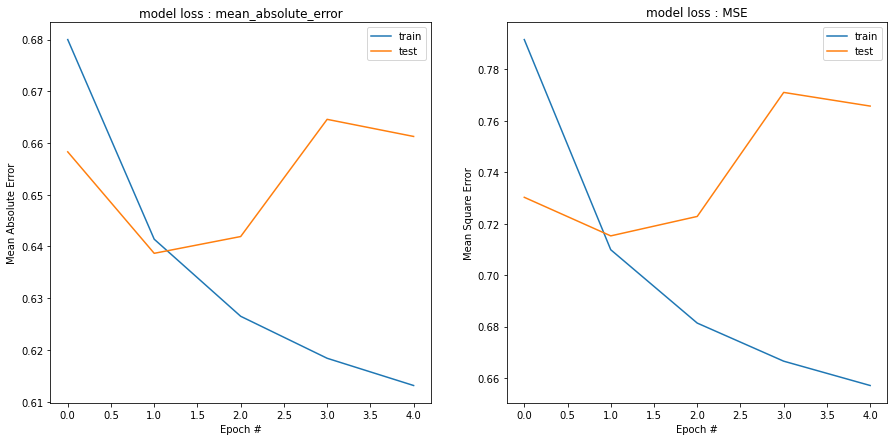

In [51]:
# ------------ Visualize loss -------------------------------
# plt.plot(history.history["mean_absolute_error"])
# plt.plot(history.history["val_mean_absolute_error"])
# plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])

fig = plt.figure(figsize=(15,7))

fig.add_subplot(121)
plt.plot(history.history["mean_absolute_error"], label="train")
plt.plot(history.history["val_mean_absolute_error"], label="test")
plt.title('model loss : mean_absolute_error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch #')
plt.legend()

fig.add_subplot(122)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.title('model loss : MSE')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch #')
plt.legend()

plt.show()

In [52]:
# ------------ Model Prediction -------------------------------
userPredictR = pd.DataFrame(model.predict([validate.userId, validate.movieId]))

In [54]:
userPredictR

,0
0,2.556202
1,3.973369
2,2.815966
3,4.720389
4,3.108998
...,...
4687513,2.728690
4687514,4.122295
4687515,3.963409
4687516,4.763523


In [55]:
validate

,userId,movieId,rating
6991406,45359,587,5.0
21730033,141279,6106,4.0
17503421,113447,495,3.5
16249801,105363,24,5.0
1940641,12918,6832,3.5
...,...,...,...
11160061,72355,13402,3.0
681893,4662,1099,5.0
12122266,78615,3650,5.0
21828980,141912,2047,4.0


<function matplotlib.pyplot.show>

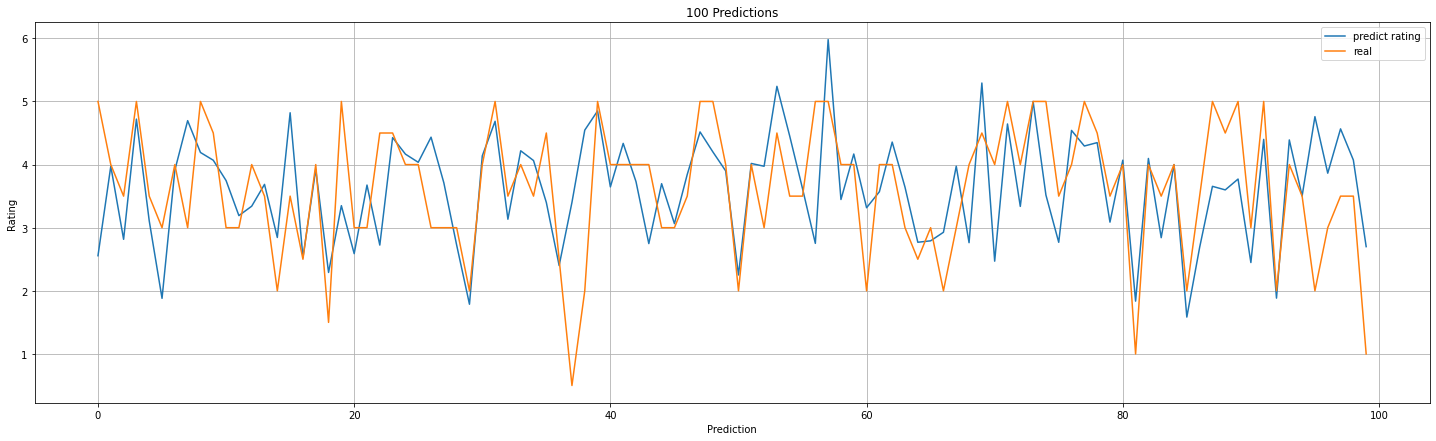

In [83]:
# plot result 
val = validate['rating'].reset_index(drop=True)
fig2 = plt.figure(figsize=(25,7))
plt.plot(userPredictR[:100], label=('predict rating'))
plt.plot(val[:100], label=('real'))
plt.legend()
plt.title('100 Predictions')
plt.xlabel('Prediction')
plt.ylabel('Rating')
plt.grid()
plt.show

In [75]:
val

,index,rating
0,6991406,5.0
1,21730033,4.0
2,17503421,3.5
3,16249801,5.0
4,1940641,3.5
...,...,...
4687513,11160061,3.0
4687514,681893,5.0
4687515,12122266,5.0
4687516,21828980,4.0
